In [1]:
#Link to DataSet 
#https://www.kaggle.com/datasets/bartoszpieniak/poland-cars-for-sale-dataset

# Over 200,000 adverts scraped from one of the poland's most popular car ads site. (Otomotto)

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [230]:
df = pd.read_csv("Data/Car_sale_ads.csv",index_col="Index")

In [231]:
df

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
Index,,,,,,,,,,,,,,,,,,,,,
0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,145.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,165.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,173.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,70.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,60.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]


# As you can see we have some empty cells

<AxesSubplot:ylabel='Index'>

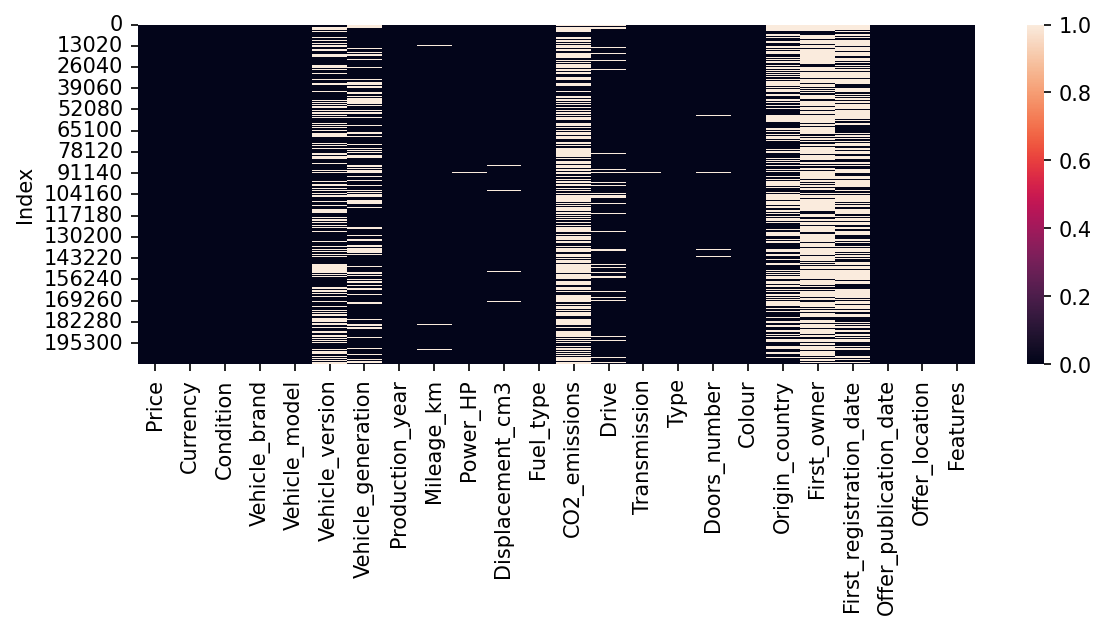

In [232]:
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(df.isnull())

# Most of the columns Vehicle_version ,Vehicle_gen, co2_emission, Origin_country, first_owner, First_registraion_date are empty so I decided to remove them

In [233]:
df.drop(["Vehicle_generation","Vehicle_version","Vehicle_version","CO2_emissions","Origin_country","First_owner","First_registration_date"], axis = 1, inplace = True)

<AxesSubplot:ylabel='Index'>

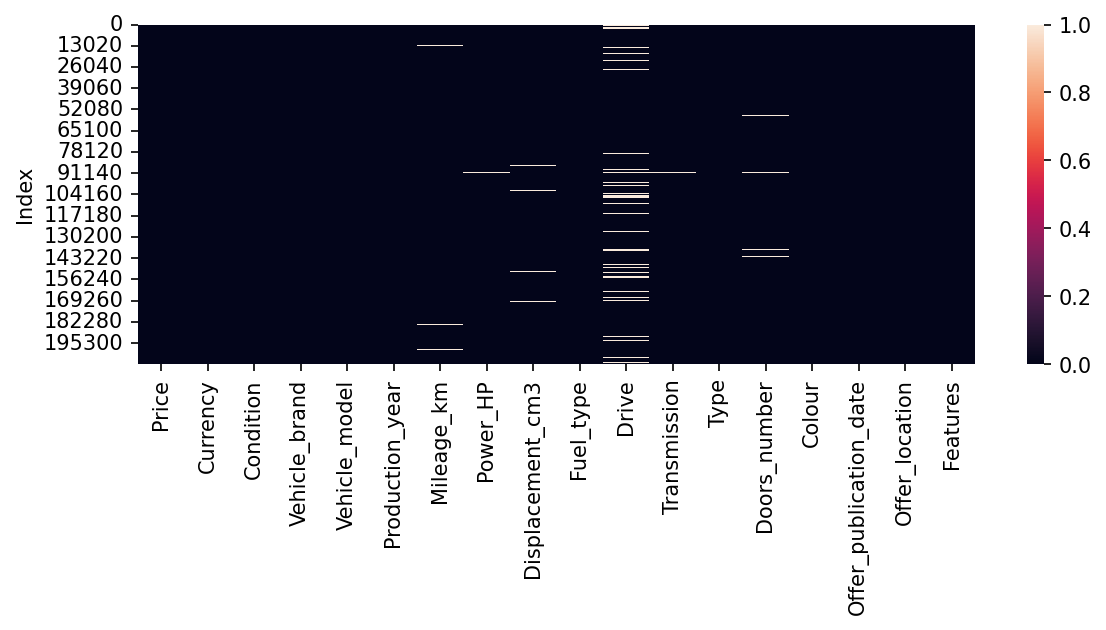

In [234]:
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='Index'>

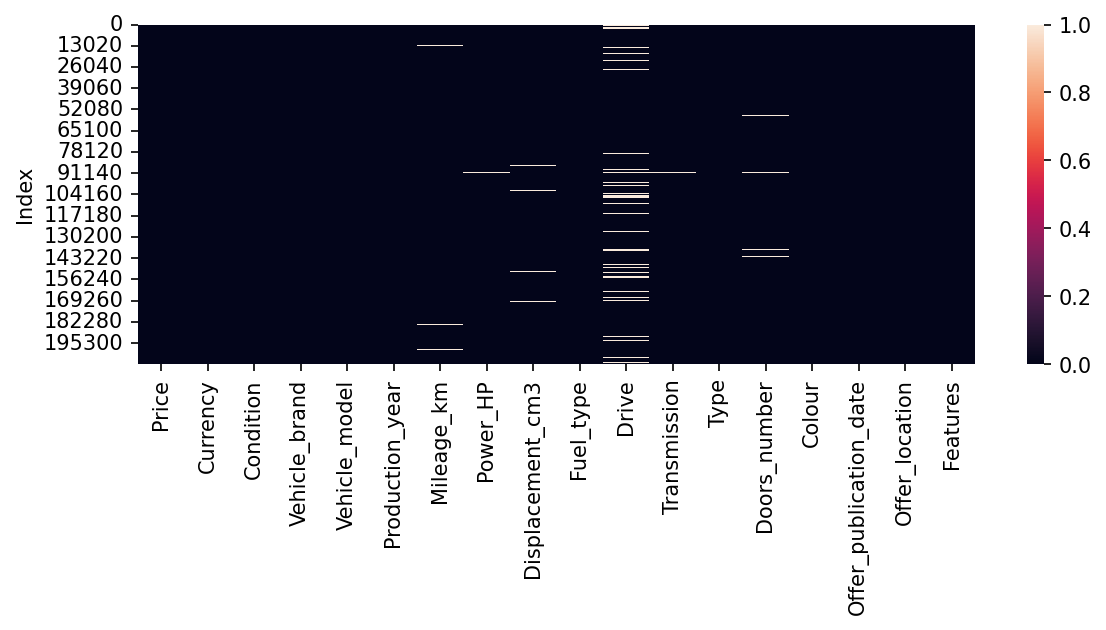

In [235]:
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(df.isnull())

# Dealing with Features (Separate them to separate columns)

In [236]:
df2 = pd.read_csv("Data/Car_sale_ads.csv",index_col="Index")

In [237]:
#spliting function

In [238]:
def spliting_features(x):
    y = x.split(",")
    y_list = []
    for element in y: 
        y_list.append(element.replace("[", "").replace("'","").replace("]","").replace(" ",""))
    
    return y_list

In [239]:
df2["Features"] = df2["Features"].apply(spliting_features)

In [240]:
unique_list = []
def uni(x):
    for el in x:
        if el not in unique_list:
            unique_list.append(el)
            

In [241]:
df2["Features"].apply(uni)

Index
0         None
1         None
2         None
3         None
4         None
          ... 
208299    None
208300    None
208301    None
208302    None
208303    None
Name: Features, Length: 208304, dtype: object

In [242]:
df2.shape

(208304, 24)

In [243]:
unique_list = unique_list[1:]

In [244]:
zero_data = np.zeros((208304, 70))

In [245]:
uni_df = pd.DataFrame(columns = unique_list, data = zero_data)

In [246]:
uni_df

,ABS,Electricfrontwindows,Driversairbag,Powersteering,ASR(tractioncontrol),Rearviewcamera,Heatedsidemirrors,CD,Electricallyadjustablemirrors,Passengersairbag,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
#y = []
#x = 0
#z = []
#for j in range(0,len(df2["Features"])):
#    for el in unique_list:
#        for i in range(0,len(df2["Features"][j])):
#            if el in df2["Features"][j]:
#                x = 1
#            else:
#                x = 0
#        y.append(x)
#    z.append(y)
#    y = []

In [248]:
#uni_df2 = pd.DataFrame(columns = unique_list, data = z)

In [249]:
#df2["Features"].iloc[-40]

In [250]:
#uni_df2

In [251]:
#uni_df2.to_csv("Data/Very_Important_DataFrame.csv")

In [252]:
df

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
Index,,,,,,,,,,,,,,,,,,
0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,NaN,Manual,small_cars,1.0,other,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,10900,PLN,Used,Żuk,Other,1970,63518.0,70.0,2120.0,Gasoline,Rear wheels,Manual,station_wagon,4.0,other,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,6900,PLN,Used,Żuk,Other,1977,11880.0,60.0,2120.0,Gasoline,NaN,Manual,SUV,3.0,red,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]


In [253]:
uni_df = pd.read_csv("Data/Very_Important_DataFrame.csv",index_col=0)

In [254]:
uni_df

,ABS,Electricfrontwindows,Driversairbag,Powersteering,ASR(tractioncontrol),Rearviewcamera,Heatedsidemirrors,CD,Electricallyadjustablemirrors,Passengersairbag,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
df.drop("Features", axis = 1,inplace=True)

In [256]:
df = pd.concat([df,uni_df],axis = 1)

In [257]:
df

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
208300,10900,PLN,Used,Żuk,Other,1970,63518.0,70.0,2120.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
208301,6900,PLN,Used,Żuk,Other,1977,11880.0,60.0,2120.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

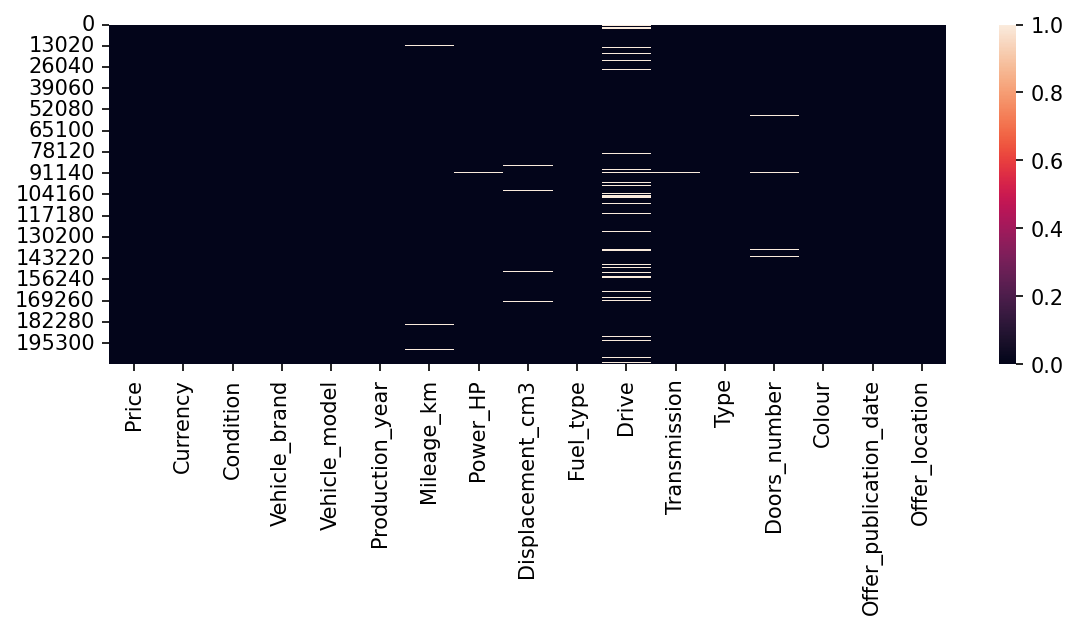

In [258]:
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(df.drop(unique_list,axis = 1).isnull())

In [259]:
df.describe()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,ABS,Electricfrontwindows,Driversairbag,Powersteering,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
count,2.083040e+05,208304.000000,2.073210e+05,207661.000000,206338.000000,206817.000000,208304.000000,208304.000000,208304.000000,208304.000000,...,208304.000000,208304.000000,208304.000000,208304.000000,208304.000000,208304.000000,208304.000000,208304.000000,208304.000000,208304.000000
mean,6.305383e+04,2012.098241,1.502768e+05,151.836281,1882.567147,4.637138,0.894764,0.871308,0.865960,0.866455,...,0.074948,0.035045,0.049471,0.047618,0.015866,0.289178,0.119215,0.141754,0.176511,0.041646
std,8.665967e+04,6.998414,2.937447e+06,77.683546,729.609660,0.768559,0.306858,0.334859,0.340696,0.340164,...,0.263308,0.183894,0.216850,0.212957,0.124958,0.453382,0.324042,0.348799,0.381255,0.199779
min,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.570000e+04,2013.000000,1.445660e+05,136.000000,1798.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.599000e+04,2017.000000,2.060000e+05,172.000000,1997.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Now we have some nan in Mileage_km ,Displacement_cm3, fuel_type, transmision and doors_number columns.

# I decided to fill the gaps in the drive column with the value of Front wheels

In [260]:
df["Drive"].value_counts()

Front wheels                    139944
Rear wheels                      18081
4x4 (permanent)                  16986
4x4 (attached automatically)     15420
4x4 (attached manually)           2797
Name: Drive, dtype: int64

In [261]:
df["Drive"].fillna("Front wheels", inplace = True)

In [262]:
df["Drive"].value_counts()

Front wheels                    155020
Rear wheels                      18081
4x4 (permanent)                  16986
4x4 (attached automatically)     15420
4x4 (attached manually)           2797
Name: Drive, dtype: int64

<AxesSubplot:>

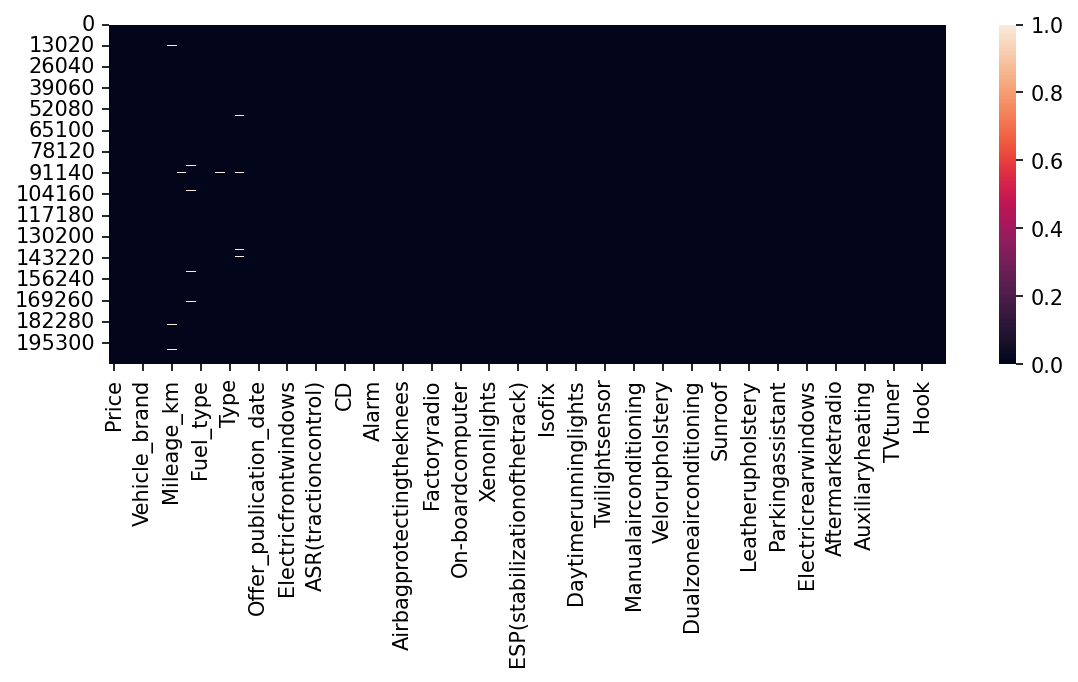

In [263]:
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(df.isnull())

# Only a small part of our data remained with empty values so I decided to delete them

In [264]:
df.drop(unique_list,axis = 1).isnull().sum()

Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 983
Power_HP                   643
Displacement_cm3          1966
Fuel_type                    0
Drive                        0
Transmission               479
Type                         0
Doors_number              1487
Colour                       0
Offer_publication_date       0
Offer_location               0
dtype: int64

In [265]:
df2 = df.dropna(how="any")

In [266]:
len(df2)/len(df)

0.9796259313311314

# We delete just 2% of data

In [267]:
df.dropna(how="any", inplace=True)

# Now we don't have any empty cells

<AxesSubplot:>

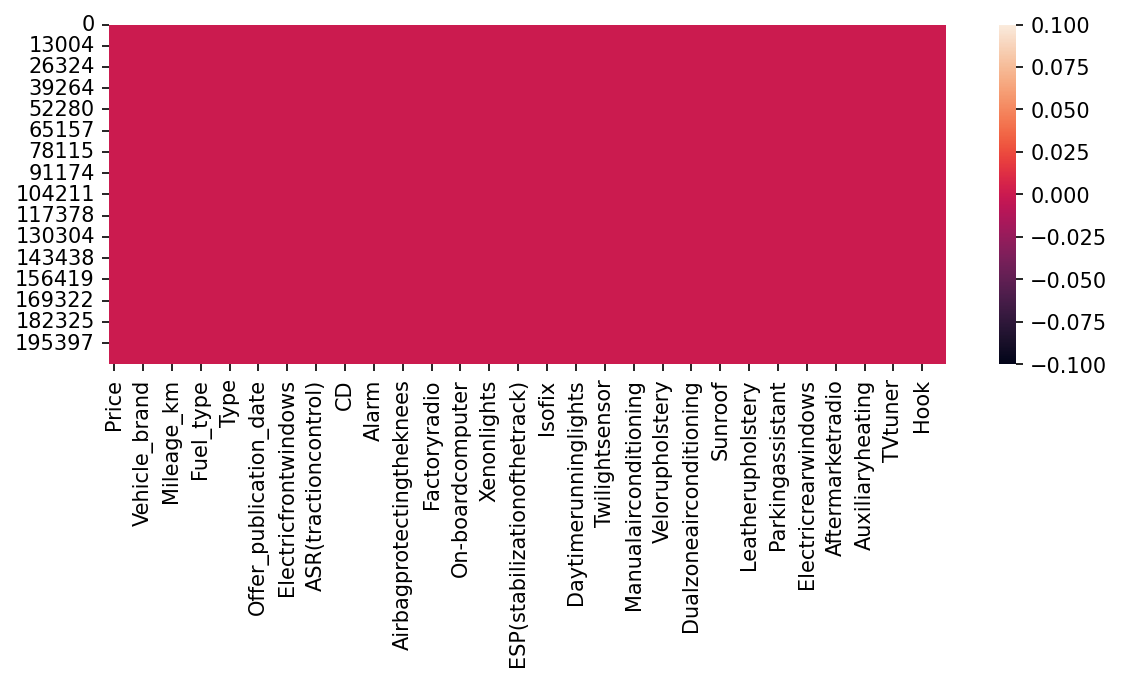

In [268]:
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(df.isnull())

# I decided keep just 50 most popular Vehicle brands

In [269]:
popular_brands = df["Vehicle_brand"].value_counts().head(50).index

In [270]:
popular_brands

Index(['Volkswagen', 'BMW', 'Audi', 'Opel', 'Ford', 'Mercedes-Benz', 'Renault',
       'Toyota', 'Škoda', 'Peugeot', 'Citroën', 'Volvo', 'Kia', 'Hyundai',
       'Fiat', 'Seat', 'Nissan', 'Mazda', 'Honda', 'Suzuki', 'Mitsubishi',
       'Jeep', 'Dacia', 'Chevrolet', 'MINI', 'Alfa Romeo', 'Land Rover',
       'Porsche', 'Lexus', 'Jaguar', 'Subaru', 'Chrysler', 'Dodge', 'Saab',
       'Infiniti', 'Smart', 'Lancia', 'SsangYong', 'Maserati', 'Cadillac',
       'Cupra', 'Daihatsu', 'Aixam', 'Daewoo', 'DS Automobiles', 'Bentley',
       'Isuzu', 'Lincoln', 'Microcar', 'Ferrari'],
      dtype='object')

In [271]:
y = df.iloc[0:2]
y

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0


In [272]:
for i in range(0,len(popular_brands)):
    x = df[df["Vehicle_brand"] == popular_brands[i]]
    y = pd.concat([y,x])
    

In [273]:
df = y[2:]

In [274]:
df["Vehicle_brand"].value_counts()

Volkswagen        18018
BMW               16491
Audi              16303
Opel              16123
Ford              15864
Mercedes-Benz     11827
Renault           10506
Toyota            10150
Škoda             10034
Peugeot            8860
Citroën            7230
Volvo              5980
Kia                5832
Hyundai            5787
Fiat               4971
Seat               4857
Nissan             4686
Mazda              4574
Honda              3972
Suzuki             2569
Mitsubishi         1932
Jeep               1719
Dacia              1637
Chevrolet          1480
MINI               1380
Alfa Romeo         1297
Land Rover         1208
Porsche             977
Lexus               971
Jaguar              962
Subaru              834
Chrysler            692
Dodge               689
Saab                459
Infiniti            287
Smart               264
Lancia              255
SsangYong           195
Maserati            181
Cadillac            164
Cupra               152
Daihatsu        

In [275]:
popular_models = df["Vehicle_model"].value_counts().head(300).index

In [276]:
most_popular_models = df["Vehicle_model"].value_counts().head(100).index

In [277]:
popular_models

Index(['Astra', 'A4', 'Seria 3', 'Golf', 'Passat', 'Octavia', 'Focus',
       'Seria 5', 'A6', 'Mondeo',
       ...
       'Sedici', 'Pacifica', 'DS4', 'Transit Custom', 'GS', 'XE', '301',
       'Impreza', 'Passat CC', 'Fox'],
      dtype='object', length=300)

In [278]:
popular_models

Index(['Astra', 'A4', 'Seria 3', 'Golf', 'Passat', 'Octavia', 'Focus',
       'Seria 5', 'A6', 'Mondeo',
       ...
       'Sedici', 'Pacifica', 'DS4', 'Transit Custom', 'GS', 'XE', '301',
       'Impreza', 'Passat CC', 'Fox'],
      dtype='object', length=300)

In [279]:
len(popular_models)

300

In [280]:
y = df.iloc[0:2]
y

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
132489,4900,PLN,Used,Volkswagen,Other,1993,343257.0,78.0,2370.0,Diesel,...,0,0,0,0,0,0,0,0,0,0
132492,11900,PLN,Used,Volkswagen,Other,1971,102026.0,90.0,1605.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0


In [281]:
for i in range(0,len(popular_models)):
    x = df[df["Vehicle_model"] == popular_models[i]]
    y = pd.concat([y,x])
    

In [282]:
y

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
132489,4900,PLN,Used,Volkswagen,Other,1993,343257.0,78.0,2370.0,Diesel,...,0,0,0,0,0,0,0,0,0,0
132492,11900,PLN,Used,Volkswagen,Other,1971,102026.0,90.0,1605.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
116465,42900,PLN,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,...,0,0,0,0,0,0,0,1,1,0
116466,11900,PLN,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
116467,25900,PLN,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185942,5900,PLN,Used,Volkswagen,Fox,2005,179632.0,68.0,1200.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
185943,7999,PLN,Used,Volkswagen,Fox,2009,190000.0,70.0,1422.0,Diesel,...,0,0,0,0,0,0,0,0,0,0
185944,9500,PLN,Used,Volkswagen,Fox,2004,134000.0,80.0,1398.0,Diesel,...,0,0,0,0,0,0,0,0,0,0
185945,8600,PLN,Used,Volkswagen,Fox,2009,205000.0,75.0,1400.0,Diesel,...,0,0,0,0,0,0,0,0,0,0


In [283]:
df = y[2:]

In [284]:
y = df.iloc[0:2]

In [285]:
len(most_popular_models)

100

In [286]:
for i in range(0,len(most_popular_models)):
    x = df[df["Vehicle_model"] == most_popular_models[i]]
    y = pd.concat([y,x])
    

In [287]:
df_most_popular = y[2:]

In [288]:
len(df)

185119

In [289]:
len(df_most_popular)

135741

# Remove unknown models

In [290]:
df = df[df["Vehicle_model"] != "Other"]

In [291]:
df_most_popular = df_most_popular[df_most_popular["Vehicle_model"] != "Other"]

In [292]:
df["Condition"].value_counts()

Used    163005
New      21416
Name: Condition, dtype: int64

In [293]:
df.head(1)

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
116465,42900,PLN,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,...,0,0,0,0,0,0,0,1,1,0


# I chose to remove column that was not important to me.

In [294]:
df.drop(["Offer_location"],axis = 1,inplace = True)

In [295]:
df_most_popular.drop(["Offer_location"],axis = 1,inplace = True)

# I delete offers in euro

In [296]:
df = df[df["Currency"] == "PLN"]

In [297]:
df_most_popular = df_most_popular[df_most_popular["Currency"] == "PLN"]

In [298]:
# Now data should be ready to analys

In [299]:
df

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
116465,42900,PLN,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,...,0,0,0,0,0,0,0,1,1,0
116466,11900,PLN,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
116467,25900,PLN,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,...,0,0,0,0,0,1,0,0,0,0
116468,8400,PLN,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,...,0,0,0,0,0,0,0,0,0,0
116469,15999,PLN,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185942,5900,PLN,Used,Volkswagen,Fox,2005,179632.0,68.0,1200.0,Gasoline,...,0,0,0,0,0,0,0,0,0,0
185943,7999,PLN,Used,Volkswagen,Fox,2009,190000.0,70.0,1422.0,Diesel,...,0,0,0,0,0,0,0,0,0,0
185944,9500,PLN,Used,Volkswagen,Fox,2004,134000.0,80.0,1398.0,Diesel,...,0,0,0,0,0,0,0,0,0,0
185945,8600,PLN,Used,Volkswagen,Fox,2009,205000.0,75.0,1400.0,Diesel,...,0,0,0,0,0,0,0,0,0,0


# Now Currency columns is useless so i delete it

In [300]:
df = df.drop("Currency", axis = 1)

In [301]:
df_most_popular = df_most_popular.drop("Currency", axis = 1)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184283 entries, 116465 to 185946
Data columns (total 85 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Price                          184283 non-null  int64  
 1   Condition                      184283 non-null  object 
 2   Vehicle_brand                  184283 non-null  object 
 3   Vehicle_model                  184283 non-null  object 
 4   Production_year                184283 non-null  int64  
 5   Mileage_km                     184283 non-null  float64
 6   Power_HP                       184283 non-null  float64
 7   Displacement_cm3               184283 non-null  float64
 8   Fuel_type                      184283 non-null  object 
 9   Drive                          184283 non-null  object 
 10  Transmission                   184283 non-null  object 
 11  Type                           184283 non-null  object 
 12  Doors_number             

In [305]:
df_most_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134957 entries, 116465 to 141868
Data columns (total 85 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Price                          134957 non-null  int64  
 1   Condition                      134957 non-null  object 
 2   Vehicle_brand                  134957 non-null  object 
 3   Vehicle_model                  134957 non-null  object 
 4   Production_year                134957 non-null  int64  
 5   Mileage_km                     134957 non-null  float64
 6   Power_HP                       134957 non-null  float64
 7   Displacement_cm3               134957 non-null  float64
 8   Fuel_type                      134957 non-null  object 
 9   Drive                          134957 non-null  object 
 10  Transmission                   134957 non-null  object 
 11  Type                           134957 non-null  object 
 12  Doors_number             

In [306]:
df["Vehicle_model"].value_counts()

Astra        5266
A4           4520
Seria 3      4514
Golf         4075
Passat       3977
             ... 
XE            127
301           126
Impreza       124
Passat CC     122
Fox           121
Name: Vehicle_model, Length: 299, dtype: int64

In [307]:
df["Colour"].value_counts()

black       45107
gray        28658
silver      27934
white       26546
blue        18975
other       12199
red          8307
brown        5076
burgundy     2919
green        2779
golden       2268
beige        2144
yellow        714
violet        657
Name: Colour, dtype: int64

In [341]:
def month(x):
    month = x.split("/")[1]
    return int(month)

In [342]:
def year(x):
    year = x.split("/")[2]
    return int(year)

In [343]:
df["Month"] = df["Offer_publication_date"].apply(month)

In [344]:
df["Year"] = df["Offer_publication_date"].apply(year) 

In [345]:
df["Year"]

116465    2021
116466    2021
116467    2021
116468    2021
116469    2021
          ... 
141729    2021
141819    2021
141829    2021
141841    2021
141868    2021
Name: Year, Length: 134957, dtype: int64

In [346]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,...,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay),Month,Year
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,...,0,0,0,0,0,1,1,0,5,2021
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141729,99900,New,Peugeot,2008,2020,5.0,130.0,1200.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,5,2021
141819,36900,Used,Peugeot,2008,2014,136000.0,92.0,1600.0,Diesel,Front wheels,...,0,0,0,1,0,0,0,0,4,2021
141829,18800,Used,Peugeot,2008,2018,23728.0,100.0,1560.0,Diesel,Front wheels,...,0,1,0,0,0,0,0,0,4,2021
141841,57900,Used,Peugeot,2008,2016,59900.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,1,0,0,0,0,5,2021


In [356]:
df.to_csv("Data/clean_data_with_features.csv")

In [348]:
df_most_popular.to_csv("Data/clean_data_most_popular_models.csv")

# Just clean Data

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [323]:
df = pd.read_csv("Data/clean_data_most_popular_models.csv",index_col = 0)

In [319]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,1,1,0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,0,0,0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141729,99900,New,Peugeot,2008,2020,5.0,130.0,1200.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,0,0
141819,36900,Used,Peugeot,2008,2014,136000.0,92.0,1600.0,Diesel,Front wheels,...,0,0,0,0,0,1,0,0,0,0
141829,18800,Used,Peugeot,2008,2018,23728.0,100.0,1560.0,Diesel,Front wheels,...,0,0,0,1,0,0,0,0,0,0
141841,57900,Used,Peugeot,2008,2016,59900.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0


In [321]:
df2 = pd.read_csv("Data/clean_data_most_popular_models.csv",index_col = 0)

In [322]:
df2

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,...,CDchanger,Auxiliaryheating,Heatedrearseats,Four-zoneairconditioning,TVtuner,Roofrails,Activecruisecontrol,Hook,Laneassistant,HUD(head-updisplay)
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,1,1,0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,...,0,0,0,0,0,0,0,0,0,0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141729,99900,New,Peugeot,2008,2020,5.0,130.0,1200.0,Gasoline,Front wheels,...,0,0,0,0,0,0,0,0,0,0
141819,36900,Used,Peugeot,2008,2014,136000.0,92.0,1600.0,Diesel,Front wheels,...,0,0,0,0,0,1,0,0,0,0
141829,18800,Used,Peugeot,2008,2018,23728.0,100.0,1560.0,Diesel,Front wheels,...,0,0,0,1,0,0,0,0,0,0
141841,57900,Used,Peugeot,2008,2016,59900.0,110.0,1199.0,Gasoline,Front wheels,...,0,0,0,0,0,1,0,0,0,0
